# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [16]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

x_train2=np.array(x_train).copy()
x_test2=np.array(x_test).copy()


### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

+ after train and test split i added 1 column of ones to the all x valuse and make the of size 5 from their original size 4 to handle a constants in linear regression.
+ fixed a learning rate and epochs and w (vector containing the weights) and then using the mse(output from cost_function) to find delta w and then update the w by w=w-learning_rate*delta_w. and run it for decided epoch.

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [3]:
# implement Linear Regression
def hypothesis(x, w):
    return np.matmul(x, w)

def cost_function(x, y, w):
    return (np.matmul((hypothesis(x, w)-y).T,(hypothesis(x, w)-y)))/(2*y.shape[0])

def gradiant(x, y, w,learning_rate,epoch):
    m=x.shape[0]
    arr=[]
    for i in range(epoch):
        h=hypothesis(x,w)
        cost=np.matmul(x.T,(h-y))/m
        w=w-learning_rate*cost
        cc=cost_function(x,y,w)
        arr.append(cc[0])
    return w,arr


In [4]:
for i in range(len(x_train)):
    x_train[i] = np.array([1]+x_train[i])
for i in range(len(x_test)):
    x_test[i] = np.array([1]+x_test[i])

x_train=np.array(x_train)
y_train=np.array(y_train).reshape(-1,1)
x_test=np.array(x_test)
y_test=np.array(y_test).reshape(-1,1)

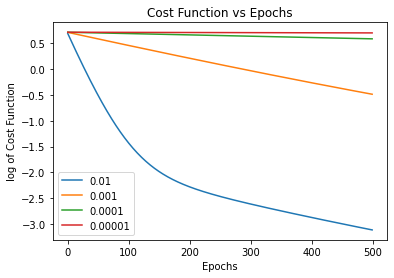

In [5]:
learning_rates = [0.01,0.001,0.0001,0.00001]
epochs = 500
for learning_rate in learning_rates:
    w = np.zeros((x_train.shape[1], 1))
    w,cost_array = gradiant(x_train, y_train, w, learning_rate, epochs)
    plt.plot(np.log(cost_array))
plt.title('Cost Function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('log of Cost Function')
plt.legend(['0.01', '0.001', '0.0001', '0.00001'])
plt.show()

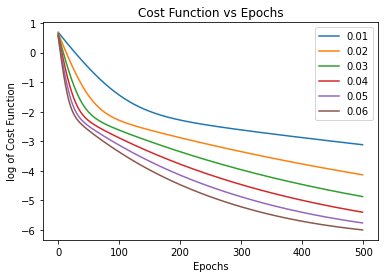

In [6]:
learning_rates = [0.01,0.02,0.03,0.04,0.05,0.06]
epochs = 500
for learning_rate in learning_rates:
    w = np.zeros((x_train.shape[1], 1))
    w,cost_array = gradiant(x_train, y_train, w, learning_rate, epochs)
    plt.plot(np.log(cost_array))
plt.title('Cost Function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('log of Cost Function')
plt.legend([str(x) for x in learning_rates])
plt.show()

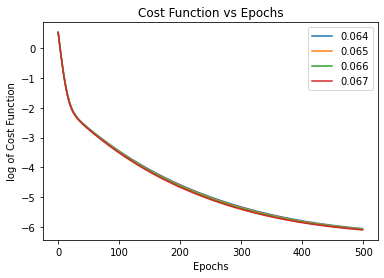

In [8]:
learning_rates = [0.064,0.065,0.066,0.067]
epochs = 500
for learning_rate in learning_rates:
    w = np.zeros((x_train.shape[1], 1))
    w,cost_array = gradiant(x_train, y_train, w, learning_rate, epochs)
    plt.plot(np.log(cost_array))
plt.title('Cost Function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('log of Cost Function')
plt.legend([str(x) for x in learning_rates])
plt.show()

+ best learning rate = 0.067 
+ MSE = 0.008145421641724071
+ epochs = 500

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

0.067 = 0.00743112

[0.00747272]


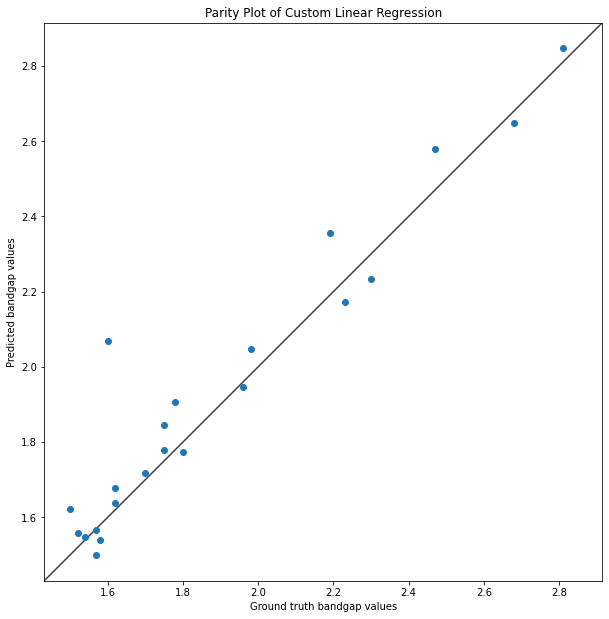

In [15]:
# Get the predictions of x_test into `y_pred`
w,cost_array = gradiant(x_train, y_train, w, 0.067, epochs)
print(cost_function(x_test, y_test, w)[0])
y_pred = hypothesis(x_test, w)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))
ax.scatter(y_test, y_pred)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),np.max([ax.get_xlim(), ax.get_ylim()]),]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [39]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import tabulate
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
alphas=[0.001,0.005,0.008,0.009,0.1,0.11,0.12,0.2,0.5,1]
rmse = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train2,y_train)
    y_pred = ridge.predict(x_test2)
    rmse.append(mean_squared_error(y_test, y_pred, squared=False))

In [40]:
table = tabulate.tabulate([["Alpha"]+alphas,["RMSE"]+rmse],tablefmt='fancy_grid')
print(table)

╒═══════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│ Alpha │ 0.001     │ 0.005     │ 0.008     │ 0.009     │ 0.1      │ 0.11      │ 0.12      │ 0.2       │ 0.5       │ 1         │
├───────┼───────────┼───────────┼───────────┼───────────┼──────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ RMSE  │ 0.0538874 │ 0.0538541 │ 0.0538304 │ 0.0538228 │ 0.053627 │ 0.0536631 │ 0.0537099 │ 0.0544477 │ 0.0615085 │ 0.0796544 │
╘═══════╧═══════════╧═══════════╧═══════════╧═══════════╧══════════╧═══════════╧═══════════╧═══════════╧═══════════╧═══════════╛


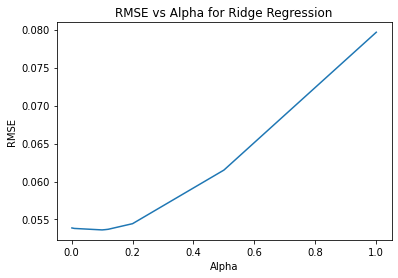

In [42]:
plt.plot(alphas,rmse)
plt.title('RMSE vs Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [83]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
alphas=[0.0001,0.0005,0.00075,0.001,0.002,0.0025,0.005,0.0075,0.01,0.1,0.5]
rmse = []
for alpha in alphas:
    ridge = Lasso(alpha=alpha)
    ridge.fit(x_train2,y_train)
    y_pred = ridge.predict(x_test2)
    rmse.append(mean_squared_error(y_test, y_pred, squared=False))

In [84]:
table = tabulate.tabulate([["Alpha"]+alphas,["RMSE"]+rmse],tablefmt='fancy_grid')
print(table)

╒═══════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤══════════╤══════════╕
│ Alpha │ 0.0001   │ 0.0005    │ 0.00075   │ 0.001     │ 0.002     │ 0.0025    │ 0.005     │ 0.0075   │ 0.01      │ 0.1      │ 0.5      │
├───────┼──────────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┼──────────┼───────────┼──────────┼──────────┤
│ RMSE  │ 0.053767 │ 0.0533422 │ 0.0531473 │ 0.0530076 │ 0.0530064 │ 0.0533398 │ 0.0580825 │ 0.064413 │ 0.0718641 │ 0.391155 │ 0.406938 │
╘═══════╧══════════╧═══════════╧═══════════╧═══════════╧═══════════╧═══════════╧═══════════╧══════════╧═══════════╧══════════╧══════════╛


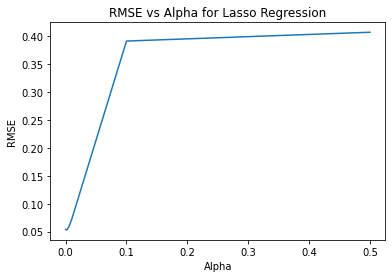

In [85]:
plt.plot(alphas,rmse)
plt.title('RMSE vs Alpha for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()